# Project Overview


In this project, you will use SQL to explore a database related to movie rentals. You will run SQL queries and build visualizations to showcase the output of your queries.


## Project Submission

The project submission is a presentation, which will be reviewed, and for which you will need to **Meet Expectations** to pass. For the presentation component, you will create **four** slides. Each slide will:

- Have a question of interest.
- Have a supporting SQL query needed to answer the question.
- Have a supporting visualization created using the final data of your SQL query that answers your question of interest.

You will submit your project at the end of the project lessons. Your project will include:

- A set of slides with a question, visualization, and small summary on each slide.
- A text file with your queries needed to answer each of the four questions.


## Additional Resources

For the second part of this project, you may want a refresher of statistics or working with spreadsheets (perhaps specific to creating data visualizations). There are additional resources in [the extracurriculars of this classroom](https://classroom.udacity.com/nanodegrees/nd104/parts/870c59b2-8220-4a8b-9aa5-8525f6de3cf3) to assist with these ideas if you need them!

# The Movie Rental Database

Details of the database and copy to download can be found [here](https://www.postgresqltutorial.com/postgresql-sample-database/)


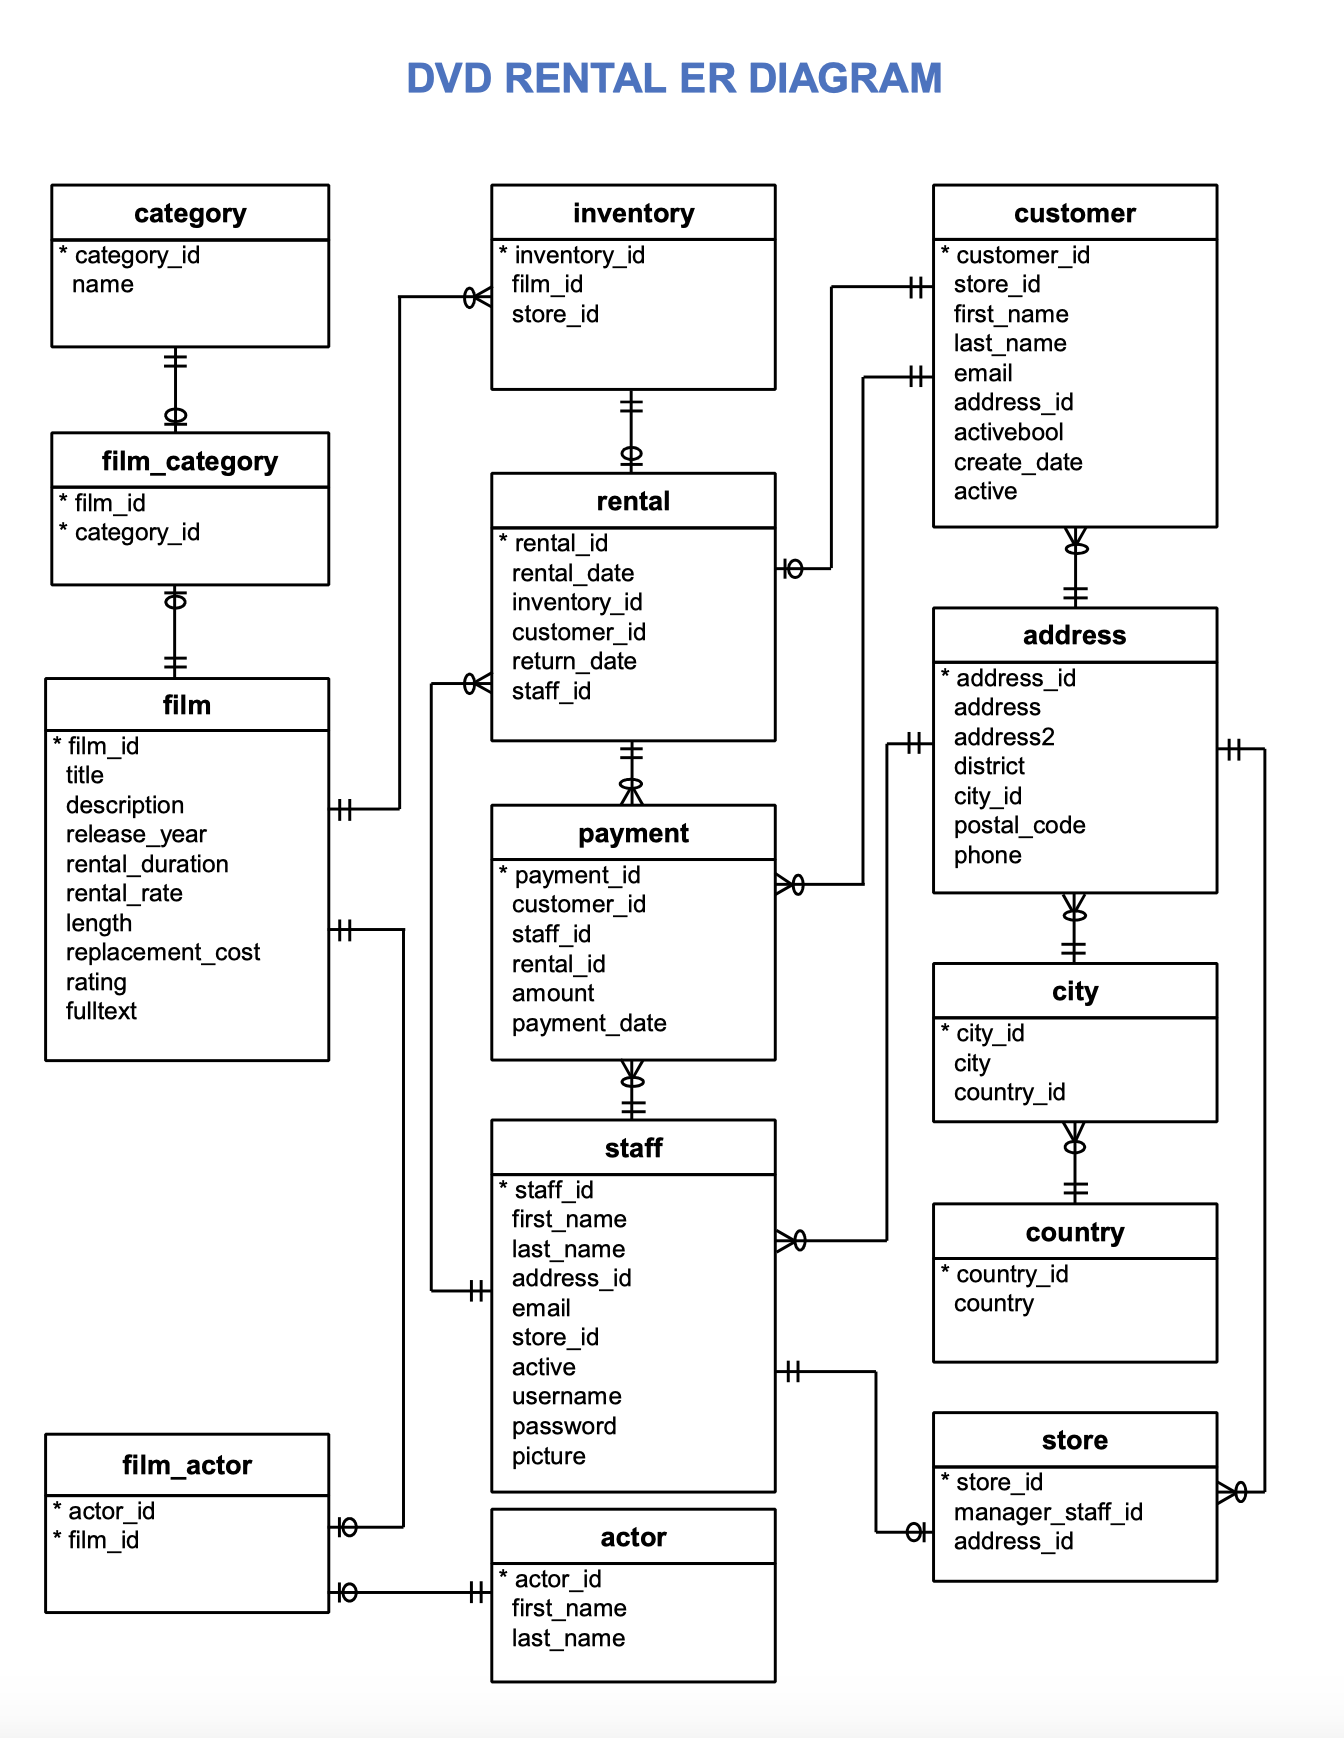

## Explore the Database in Jupyter Notebook

### Connection and load SQL magic

In [3]:
%load_ext sql

from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost/dvdrental')

%sql postgresql://localhost/dvdrental

'Connected: @dvdrental'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Show all tables

If in `psql`, run this command instead `/dt`

In [4]:
%%sql
SELECT * 
FROM pg_catalog.pg_tables
WHERE 
  schemaname != 'pg_catalog' 
AND schemaname != 'information_schema';

 * postgresql://localhost/dvdrental
15 rows affected.


schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
public,actor,postgres,None,True,False,True,False
public,store,postgres,None,True,False,True,False
public,address,postgres,None,True,False,True,False
public,category,postgres,None,True,False,True,False
public,city,postgres,None,True,False,True,False
public,country,postgres,None,True,False,True,False
public,customer,postgres,None,True,False,True,False
public,film_actor,postgres,None,True,False,True,False
public,film_category,postgres,None,True,False,True,False
public,inventory,postgres,None,True,False,True,False


### Describe a table

I can do this in `psql` by running `/d table_name` or `/d+ table_name`, and the result will show detailed information of the table. 

If I'd only want list of column names, run the following SQL query:

In [102]:
%%sql 
SELECT COLUMN_NAME 
FROM information_schema.COLUMNS 
WHERE TABLE_NAME='rental';

 * postgresql://localhost/dvdrental
7 rows affected.


column_name
rental_id
rental_date
inventory_id
customer_id
return_date
staff_id
last_update


### View records

In [31]:
r = %sql SELECT * FROM film LIMIT 10;

r.DataFrame()

 * postgresql://localhost/dvdrental
10 rows affected.


,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
5,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ace':1 'administr':9 'ancient':19 'astound':4...
6,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'adapt':1 'astound':4 'baloon':19 'car':11 'fa...
7,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,2013-05-26 14:50:58.951,"[Commentaries, Behind the Scenes]",'affair':1 'chase':14 'documentari':5 'fanci':...
8,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,2013-05-26 14:50:58.951,[Deleted Scenes],'african':1 'chef':11 'dentist':14 'documentar...
9,6,Agent Truman,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,3,2.99,169,17.99,PG,2013-05-26 14:50:58.951,[Deleted Scenes],'agent':1 'ancient':19 'boy':11 'china':20 'es...


# Practices Quiz

### Quiz 1

#### Question 1 of 3
Let's start with creating a table that provides the following details: actor's first and last name combined as full_name, film title, film description and length of the movie.

How many rows are there in the table?

**Answer:** There are totally 5462 rows. Actually this is just the number of rows in `film_actor` table.

In [49]:
%%sql r <<
SELECT a.first_name||' '||a.last_name AS actor,
       f.title, f.description, f.length
FROM film f
JOIN film_actor fa ON f.film_id = fa.film_id
JOIN actor a ON a.actor_id=fa.actor_id

 * postgresql://localhost/dvdrental
5462 rows affected.
Returning data to local variable r


In [51]:
r.DataFrame().head(10)

,actor,title,description,length
0,Penelope Guiness,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,86
1,Penelope Guiness,Anaconda Confessions,A Lacklusture Display of a Dentist And a Denti...,92
2,Penelope Guiness,Angels Life,A Thoughtful Display of a Woman And a Astronau...,74
3,Penelope Guiness,Bulworth Commandments,A Amazing Display of a Mad Cow And a Pioneer w...,61
4,Penelope Guiness,Cheaper Clyde,A Emotional Character Study of a Pioneer And a...,87
5,Penelope Guiness,Color Philadelphia,A Thoughtful Panorama of a Car And a Crocodile...,149
6,Penelope Guiness,Elephant Trojan,A Beautiful Panorama of a Lumberjack And a For...,126
7,Penelope Guiness,Gleaming Jawbreaker,A Amazing Display of a Composer And a Forensic...,89
8,Penelope Guiness,Human Graffiti,A Beautiful Reflection of a Womanizer And a Su...,68
9,Penelope Guiness,King Evolution,A Action-Packed Tale of a Boy And a Lumberjack...,184


#### Question 2 of 3

Write a query that creates a list of actors and movies where the movie length was more than 60 minutes. How many rows are there in this query result?

**Answer:** There are 4900 rows. I used subquery to filter long films `lm` first for performance effeciency.

In [52]:
%%sql r <<
SELECT a.first_name||' '||a.last_name AS actor,
       lm.title, lm.length
FROM (SELECT title, film_id, length FROM film WHERE length > 60) lm
JOIN film_actor fa ON lm.film_id = fa.film_id
JOIN actor a ON a.actor_id=fa.actor_id

 * postgresql://localhost/dvdrental
4900 rows affected.
Returning data to local variable r


In [53]:
r.DataFrame().head(10)

,actor,title,length
0,Penelope Guiness,Academy Dinosaur,86
1,Penelope Guiness,Anaconda Confessions,92
2,Penelope Guiness,Angels Life,74
3,Penelope Guiness,Bulworth Commandments,61
4,Penelope Guiness,Cheaper Clyde,87
5,Penelope Guiness,Color Philadelphia,149
6,Penelope Guiness,Elephant Trojan,126
7,Penelope Guiness,Gleaming Jawbreaker,89
8,Penelope Guiness,Human Graffiti,68
9,Penelope Guiness,King Evolution,184


#### Question 3 of 3

Write a query that captures the actor id, full name of the actor, and counts the number of movies each actor has made. (*HINT: Think about whether you should group by actor id or the full name of the actor.*) 

Identify the actor who has made the maximum number movies.

In [69]:
%%sql
SELECT COUNT(*) count, first_name ||' '||last_name actor
FROM actor
GROUP BY 2
HAVING COUNT(*) >1

 * postgresql://localhost/dvdrental
1 rows affected.


count,actor
2,Susan Davis


As returned above, there is repeated full name in `actor` table. so I shall use actor_id for group by to answer the query.

In [74]:
%%sql
WITH t1 AS(
    SELECT actor_id, COUNT(*) num_movies
    FROM film_actor
    GROUP BY 1)

SELECT t1.actor_id, a.first_name||' '||a.last_name actor,
       t1.num_movies
FROM t1 
JOIN actor a ON t1.actor_id = a.actor_id
ORDER BY 3 DESC
LIMIT 1;

 * postgresql://localhost/dvdrental
1 rows affected.


actor_id,actor,num_movies
107,Gina Degeneres,42


### Quiz 2

#### Question 1 of 2

Write a query that displays a table with 4 columns: actor's full name, film title, length of movie, and a column name "filmlen_groups" that classifies movies based on their length. Filmlen_groups should include 4 categories: 1 hour or less, Between 1-2 hours, Between 2-3 hours, More than 3 hours.

Match the filmlen_groups with the movie titles in your result dataset.

In [98]:
%%sql r <<
WITH f AS
(SELECT film_id, title, length, 
       CASE WHEN (length/60.0) <=1 THEN '1 hour or less'
            WHEN (length/60.0) <=2 THEN 'Between 1-2 hours'
            WHEN (length/60.0) <=3 THEN 'Between 2-3 hours'
            ELSE 'More than 3 hours' END AS filmlen_groups
FROM film)

SELECT a.first_name||' '||a.last_name actor,
       f.title, f.length, f.filmlen_groups
FROM actor a 
JOIN film_actor fa ON fa.actor_id = a.actor_id
JOIN f ON f.film_id = fa.film_id
ORDER BY 2;

 * postgresql://localhost/dvdrental
5462 rows affected.
Returning data to local variable r


In [99]:
r.DataFrame().head(20)

,actor,title,length,filmlen_groups
0,Rock Dukakis,Academy Dinosaur,86,Between 1-2 hours
1,Mary Keitel,Academy Dinosaur,86,Between 1-2 hours
2,Johnny Cage,Academy Dinosaur,86,Between 1-2 hours
3,Penelope Guiness,Academy Dinosaur,86,Between 1-2 hours
4,Sandra Peck,Academy Dinosaur,86,Between 1-2 hours
5,Christian Gable,Academy Dinosaur,86,Between 1-2 hours
6,Oprah Kilmer,Academy Dinosaur,86,Between 1-2 hours
7,Warren Nolte,Academy Dinosaur,86,Between 1-2 hours
8,Lucille Tracy,Academy Dinosaur,86,Between 1-2 hours
9,Mena Temple,Academy Dinosaur,86,Between 1-2 hours


#### Question 2 of 2

Now, we bring in the advanced SQL query concepts! Revise the query you wrote above to create a count of movies in each of the 4 filmlen_groups: 1 hour or less, Between 1-2 hours, Between 2-3 hours, More than 3 hours.

Match the count of movies in each filmlen_group.

In [91]:
%%sql

SELECT filmlen_groups, COUNT(*) count
FROM 
(SELECT film_id, title, length, 
       CASE WHEN (length/60.0) <=1 THEN '1 hour or less'
            WHEN (length/60.0) <=2 THEN 'Between 1-2 hours'
            WHEN (length/60.0) <=3 THEN 'Between 2-3 hours'
            ELSE 'More than 3 hours' END AS filmlen_groups
FROM film) sub
GROUP BY filmlen_groups
ORDER BY 1;

 * postgresql://localhost/dvdrental
4 rows affected.


filmlen_groups,count
1 hour or less,104
Between 1-2 hours,439
Between 2-3 hours,418
More than 3 hours,39


**Udacity Solution** 

It uses Window Function (`PARTITION BY` to replace `GROUP BY`) to write the query:

In [101]:
%%sql

SELECT DISTINCT(filmlen_groups),
       COUNT(title) OVER (PARTITION BY filmlen_groups) AS count
FROM
(SELECT film_id, title, length, 
       CASE WHEN (length/60.0) <=1 THEN '1 hour or less'
            WHEN (length/60.0) <=2 THEN 'Between 1-2 hours'
            WHEN (length/60.0) <=3 THEN 'Between 2-3 hours'
            ELSE 'More than 3 hours' END AS filmlen_groups
FROM film) sub
ORDER BY 1;

 * postgresql://localhost/dvdrental
4 rows affected.


filmlen_groups,count
1 hour or less,104
Between 1-2 hours,439
Between 2-3 hours,418
More than 3 hours,39
